Mounting the drive with colab to access the files

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Customer churn prediction using Neural Networks**


**Importing the necessary libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
sns.set()
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [0]:
## Reading the CSV file from drive
churn=pd.read_csv("gdrive/My Drive/AIML/bank.csv")

In [55]:
## Checking the dimension of the dataset
churn.shape

(10000, 14)

In [56]:
## Getting the info about the datatypes and null/non-null value counts in each column
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
## Displaying the first few columns of the dataset
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
## Dropping the columns that are not needed for the analysis
churn=churn.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [59]:
## Checking the dimension after dropping columns
churn.shape

(10000, 11)

In [60]:
## Checking the info on datatype and null value after columns drop
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [0]:
## Splitting the target and independent variables
X= churn.drop(['Exited'],axis=1)
y=churn['Exited']

In [62]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [0]:
## One-hot encoding the categorical columns in the independent variables and dropping the first column as string values cannot be analysed 
## and these categorical columns are considered important in this analysis
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [64]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [65]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [0]:
## Spliiting into train and test data at ratio of 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=50)

In [67]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,648.893143,38.712714,5.007429,75908.694407,1.530143,0.703571,0.514714,100057.818634,0.249429,0.247571,0.550571
std,97.073946,10.401960,2.888399,62490.258613,0.580637,0.456715,0.499819,57560.085944,0.432713,0.431632,0.497471
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,582.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,50743.832500,0.000000,0.000000,0.000000
50%,650.000000,37.000000,5.000000,96600.990000,1.000000,1.000000,1.000000,100561.895000,0.000000,0.000000,1.000000
75%,715.000000,44.000000,7.000000,127304.595000,2.000000,1.000000,1.000000,149458.040000,0.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000


In [68]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,654.345333,39.409667,5.025333,77832.677343,1.530333,0.710000,0.516000,100165.889457,0.254333,0.248000,0.534333
std,95.571848,10.671260,2.901407,62169.761924,0.584118,0.453838,0.499827,57404.122377,0.435558,0.431924,0.498903
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000,0.000000,0.000000
25%,588.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51834.342500,0.000000,0.000000,0.000000
50%,655.000000,38.000000,5.000000,98439.220000,1.000000,1.000000,1.000000,98772.465000,0.000000,0.000000,1.000000
75%,722.000000,45.000000,8.000000,128492.590000,2.000000,1.000000,1.000000,148782.695000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [0]:
## Standardising and Normalizing the data before going into the actual analysis so that mean is 0 and std.deviation is 1 approximately.
## To ensure that there is no huge variation in values between independent variables as the result will be biased towards the variable with greater values
scaler = StandardScaler()
X_train1 = scaler.fit_transform( X_train )
X_test1 = scaler.transform( X_test )

In [0]:
## Imputing the standardised values into X.
X_train=pd.DataFrame(X_train1,index=X_train.index,columns=X_train.columns)
X_test=pd.DataFrame(X_test1,index=X_test.index,columns=X_test.columns)

In [71]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,2.447566e-16,1.243093e-16,5.054687e-17,-1.973342e-16,9.072108e-18,-6.186797e-16,-9.773135e-17,-1.256455e-16,5.544137e-16,4.808852e-16,-1.196820e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-3.079245e+00,-1.991374e+00,-1.733758e+00,-1.214815e+00,-9.131015e-01,-1.540615e+00,-1.029875e+00,-1.738242e+00,-5.764705e-01,-5.736112e-01,-1.106819e+00
25%,-6.891439e-01,-6.453777e-01,-1.041284e+00,-1.214815e+00,-9.131015e-01,-1.540615e+00,-1.029875e+00,-8.568005e-01,-5.764705e-01,-5.736112e-01,-1.106819e+00
50%,1.140302e-02,-1.646648e-01,-2.572048e-03,3.311520e-01,-9.131015e-01,6.490915e-01,9.709920e-01,8.758020e-03,-5.764705e-01,-5.736112e-01,9.034903e-01
75%,6.810435e-01,5.083334e-01,6.899024e-01,8.225214e-01,8.092673e-01,6.490915e-01,9.709920e-01,8.582988e-01,-5.764705e-01,-5.736112e-01,9.034903e-01
max,2.071835e+00,5.123178e+00,1.728614e+00,2.800467e+00,4.254005e+00,6.490915e-01,9.709920e-01,1.735926e+00,1.734694e+00,1.743341e+00,9.034903e-01


In [72]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.056169,0.067007,0.006199,0.030791,0.000328,0.014077,0.002573,0.001878,0.011336,0.000993,-0.032644
std,0.984597,1.025963,1.004575,0.994942,1.006066,0.993771,1.000088,0.997362,1.006647,1.000747,1.002949
min,-3.079245,-1.991374,-1.733758,-1.214815,-0.913102,-1.540615,-1.029875,-1.736590,-0.576470,-0.573611,-1.106819
25%,-0.627331,-0.645378,-0.695047,-1.214815,-0.913102,-1.540615,-1.029875,-0.837854,-0.576470,-0.573611,-1.106819
50%,0.062914,-0.068522,-0.002572,0.360570,-0.913102,0.649092,0.970992,-0.022332,-0.576470,-0.573611,0.903490
75%,0.753159,0.604476,1.036140,0.841534,0.809267,0.649092,0.970992,0.846565,1.734694,-0.573611,0.903490
max,2.071835,5.123178,1.728614,2.600253,4.254005,0.649092,0.970992,1.736304,1.734694,1.743341,0.903490


In [73]:
## Checking the dimesnion of train and test data
print('training shapes:', {X_train.shape}, {y_train.shape})
print('testing shapes:' ,{X_test.shape}, {y_test.shape})

training shapes: {(7000, 11)} {(7000,)}
testing shapes: {(3000, 11)} {(3000,)}


# **Initialising and Building Model**

In [74]:
## Initialising the latest tensorflow version
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
tf.random.set_seed(42)

2.1.0-rc1


# **Defining a Sequential Model**

In [0]:
## Initialising a sequential model
model = tf.keras.models.Sequential()

**Adding the output layer to the model**


In [0]:
## Adding the output layer to the model with a single neuron , input shape as 11 as there are only 11 inputs and keeping activation as Sigmoid as its a binary classifier
model.add(tf.keras.layers.Dense(1,input_shape=(11,), activation='sigmoid'))

**Compiling the model**

In [0]:
## Compiling model with SGD optimizer, binary crossentropy loss function as its a binary classification, and measuring metric is accuracy score.
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

**Summarize the model**

In [78]:
## Displaying the summary statistics of the model to check total no of trainanble and non-trainable parameters.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [79]:
## Fitting the model on train data and validating it on the test data with 50 epochs
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=50)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 114us/sample - loss: 0.7155 - accuracy: 0.5814 - val_loss: 0.6210 - val_accuracy: 0.6747
Epoch 2/50
7000/7000 [==============================] - 1s 72us/sample - loss: 0.5540 - accuracy: 0.7457 - val_loss: 0.5206 - val_accuracy: 0.7817
Epoch 3/50
7000/7000 [==============================] - 0s 67us/sample - loss: 0.4894 - accuracy: 0.7951 - val_loss: 0.4782 - val_accuracy: 0.8050
Epoch 4/50
7000/7000 [==============================] - 0s 64us/sample - loss: 0.4613 - accuracy: 0.8039 - val_loss: 0.4578 - val_accuracy: 0.8127
Epoch 5/50
7000/7000 [==============================] - 0s 62us/sample - loss: 0.4474 - accuracy: 0.8056 - val_loss: 0.4470 - val_accuracy: 0.8177
Epoch 6/50
7000/7000 [==============================] - 0s 65us/sample - loss: 0.4400 - accuracy: 0.8059 - val_loss: 0.4410 - val_accuracy: 0.8177
Epoch 7/50
7000/7000 [==============================] - 0s 66us/sampl

Loss is found to be more and accuracy is somewhat lesser. Inorder to have a better accuracy and less loss, trying to optimise the model using more hidden layers and making use of learning rate and dropout rates.

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, (model.predict(X_test)>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2401
           1       0.60      0.25      0.35       599

    accuracy                           0.82      3000
   macro avg       0.72      0.60      0.62      3000
weighted avg       0.79      0.82      0.79      3000



## **Optimizing the model by adding a hidden layer and using learning rate**

In [0]:
## Creating a sequential model
model1 = tf.keras.models.Sequential()

In [0]:
# Add Dense Layer which has 110 neurons and applying sigmoid activation with 11 inputs
model1.add(tf.keras.layers.Dense(110,input_shape=(11,), activation='sigmoid'))

# Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
model1.add(tf.keras.layers.Dropout(rate=0.05))

# Add another Dense Layer which has 110 neurons and applying sigmoid activation
model1.add(tf.keras.layers.Dense(110, activation='sigmoid'))

## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
model1.add(tf.keras.layers.Dropout(rate=0.05))

# Add output Dense Layer which has 1 neuron which provides final binary output and applying sigmoid activation
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [85]:
## Displaying the summary of the model created
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 110)               1320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 110)               440       
_________________________________________________________________
dropout_2 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 110)               12210     
_________________________________________________________________
dropout_3 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 111       
Total params: 14,081
Trainable params: 13,861
Non-trainable params: 220
________________________________________________

In [0]:
## Initialising a learning rate to have a optimal gradient descent ( acceptable range of minimium error)
from tensorflow.keras.optimizers import SGD
learning_rate=0.03
sgd = SGD(lr=learning_rate)

In [87]:
## Compiling model with SGD optimizer, binary crossentropy loss function as its a binary classification, and measuring metric is accuracy score.
## Fitting the model on train data and validating it on the test data with 50 epochs
model1.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history=model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 186us/sample - loss: 0.4736 - accuracy: 0.7909 - val_loss: 0.4703 - val_accuracy: 0.8003
Epoch 2/50
7000/7000 [==============================] - 1s 87us/sample - loss: 0.4312 - accuracy: 0.8079 - val_loss: 0.4343 - val_accuracy: 0.8107
Epoch 3/50
7000/7000 [==============================] - 1s 90us/sample - loss: 0.4306 - accuracy: 0.8071 - val_loss: 0.4268 - val_accuracy: 0.8190
Epoch 4/50
7000/7000 [==============================] - 1s 85us/sample - loss: 0.4286 - accuracy: 0.8084 - val_loss: 0.4244 - val_accuracy: 0.8203
Epoch 5/50
7000/7000 [==============================] - 1s 90us/sample - loss: 0.4268 - accuracy: 0.8097 - val_loss: 0.4224 - val_accuracy: 0.8227
Epoch 6/50
7000/7000 [==============================] - 1s 89us/sample - loss: 0.4261 - accuracy: 0.8103 - val_loss: 0.4194 - val_accuracy: 0.8267
Epoch 7/50
7000/7000 [==============================] - 1s 86us/sampl

# **Plotting the accuracy scores obtained for train and validation data**

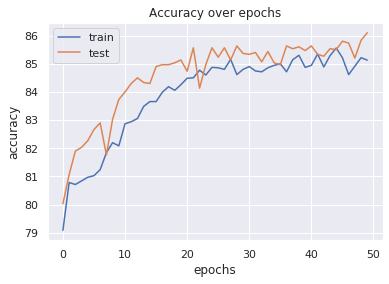

In [88]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.title('Accuracy over epochs')
plt.show()


In [89]:
## Predicting the values of target variable customer churn or not using the model built
y_pred = model1.predict(X_test)
print(y_pred[:10])

[[0.5478967 ]
 [0.02477037]
 [0.42569783]
 [0.18109392]
 [0.05010019]
 [0.0797213 ]
 [0.00734061]
 [0.14944384]
 [0.8395234 ]
 [0.01731607]]


# **Predicted the results using 0.5 as a threshold**

In [90]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:10])

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]


## **Printing the Accuracy score and confusion matrix**

[[2319   82]
 [ 335  264]]


Text(0.5, 21.5, 'Predicted')

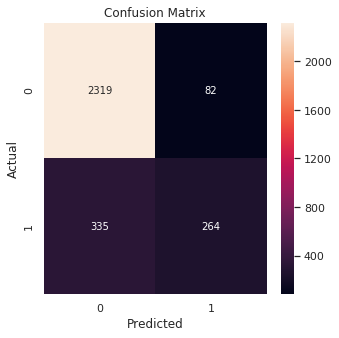

In [91]:
## Printing the confusion matrix to find the total number of correctly predicted results
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (5,5))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

Out of the 3000 values, 2583 values are being correctly classified by the above initialised Neural Networks model.

In [92]:
## Printing the accuracy score of the model on predictions made on test data.
print((metrics.accuracy_score(y_test,y_pred)*100),'% of testing data was classified correctly')

86.1 % of testing data was classified correctly


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2401
           1       0.76      0.44      0.56       599

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.85      3000



**Comparing the classification report obtained from the above two models, it is evident that,**

**Precision, recall, f1score and accuracy are more for the optimised model and its able to predict the results in a better way comparitively in a model with only one neuron.**

**The more number of hidden layers, dropout and learning rate help in achieving the better model parameters.** 